In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [159]:
df = pd.read_csv("/Users/gihoz/OneDrive/Desktop/ReAdmitAi/data/diabetic_data.csv")

In [149]:
print(df.shape)
df.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [69]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [55]:
unique_counts = pd.DataFrame({
    "column": df.columns,
    "unique_values": [df[col].nunique() for col in df.columns]
})
unique_counts



,column,unique_values
0,encounter_id,101766
1,patient_nbr,71518
2,race,6
3,gender,3
4,age,10
5,weight,10
6,admission_type_id,8
7,discharge_disposition_id,26
8,admission_source_id,17
9,time_in_hospital,14


In [56]:



nulls_each_column = pd.DataFrame({
    "column": df.columns,
    "unique_values": [df[col].isnull().sum() for col in df.columns]
})
nulls_each_column

,column,unique_values
0,encounter_id,0
1,patient_nbr,0
2,race,0
3,gender,0
4,age,0
5,weight,0
6,admission_type_id,0
7,discharge_disposition_id,0
8,admission_source_id,0
9,time_in_hospital,0


**From the observarions we saw, these columns have a lot of null values.** 
``max_glu_serum``:	96420
``23	A1Cresult``:	84748
 **Let's drop them!**

In [160]:
df_clean = df.drop(columns=["max_glu_serum", "A1Cresult"])




In [161]:
null_counts = df_clean.isna().sum().sort_values(ascending=False)
print(null_counts[null_counts > 0])

Series([], dtype: int64)


In [59]:
print(pd.crosstab(df["race"], df["readmitted"], normalize="index") * 100)

readmitted             <30        >30         NO
race                                            
?                 8.271007  23.669160  68.059833
AfricanAmerican  11.218116  34.534097  54.247788
Asian            10.140406  25.117005  64.742590
Caucasian        11.290556  35.643044  53.066400
Hispanic         10.407462  31.516937  58.075601
Other             9.628154  29.614874  60.756972



Readmission value counts:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


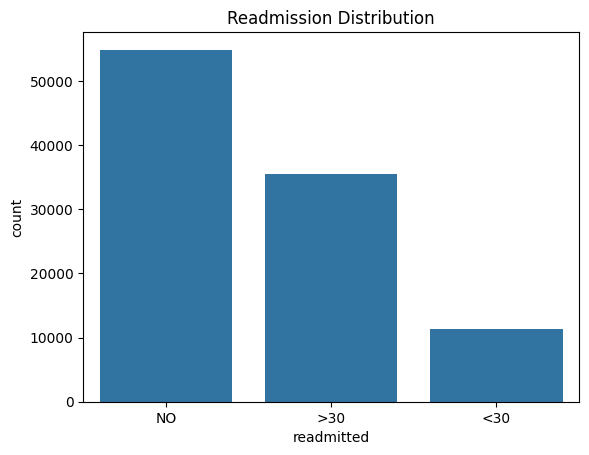

In [60]:
# Readmission target distribution
print("\nReadmission value counts:")
print(df['readmitted'].value_counts(dropna=False))

# Visualize readmission distribution
sns.countplot(x='readmitted', data=df)
plt.title("Readmission Distribution")
plt.show()


Though the dataset seem to be having non null only, there are some columns with nulls but they put their ?, so we have to replace that with nan in order to deal withit

In [162]:
df_clean.replace("?", np.nan, inplace=True)

we are going to again deal with this missing values

- let's drop these columns with a lot of missing values that won't help 

In [15]:
df1 = df.copy() # in case we need a the original one

- we are dropping: 
 * weight 
 * medical_specialty


In [163]:
df_clean.drop(["weight", "medical_specialty","encounter_id","patient_nbr",
                "payer_code", "admission_source_id"], axis=1, inplace=True)

In [75]:
for col in df_clean.columns:
    print(f"\n--- {col} ---")
    print(df_clean[col].value_counts(dropna=False))


--- race ---
race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

--- gender ---
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

--- age ---
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

--- admission_type_id ---
admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

--- discharge_disposition_id ---
discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14


 why we remove those features? just plot it or check the count. E.g., miglitol: all data are filled by No

In [164]:
df_clean.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)



let's also remove duplicates

In [165]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   number_outpatient         101766 non-null  int64 
 10  number_emergency          101766 non-null  int64 
 11  number_inpatient          101766 non-null  int64 
 12  diag_1                    101745 non-null  object
 13  diag_2                    101408 non-null  object
 14  diag

(mode imputation), since the proportion of missing values is small.

In [166]:
df_clean['race'].fillna(df['race'].mode()[0], inplace=True)


C:\Users\gihoz\AppData\Local\Temp\ipykernel_9784\4114442326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['race'].fillna(df['race'].mode()[0], inplace=True)


In [167]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   number_outpatient         101766 non-null  int64 
 10  number_emergency          101766 non-null  int64 
 11  number_inpatient          101766 non-null  int64 
 12  diag_1                    101745 non-null  object
 13  diag_2                    101408 non-null  object
 14  diag

let's also handle the missing values for diagnosis

In [168]:
# First, convert all values in diag_1 to string to safely use .startswith()
df_clean['diag_1'] = df_clean['diag_1'].astype(str)

# Then, flag those that start with '250' as 'Yes', else 'No'
df_clean['diag_1'] = df_clean['diag_1'].apply(lambda val: 'Yes' if val.startswith('250') else 'No')

# Finally, drop diag_2 and diag_3
df_clean.drop(['diag_2', 'diag_3'], axis=1, inplace=True)



In [169]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   number_outpatient         101766 non-null  int64 
 10  number_emergency          101766 non-null  int64 
 11  number_inpatient          101766 non-null  int64 
 12  diag_1                    101766 non-null  object
 13  number_diagnoses          101766 non-null  int64 
 14  insu

let's also remove duplicates

In [170]:
df_clean = df_clean.drop_duplicates()

In [171]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101752 entries, 0 to 101765
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101752 non-null  object
 1   gender                    101752 non-null  object
 2   age                       101752 non-null  object
 3   admission_type_id         101752 non-null  int64 
 4   discharge_disposition_id  101752 non-null  int64 
 5   time_in_hospital          101752 non-null  int64 
 6   num_lab_procedures        101752 non-null  int64 
 7   num_procedures            101752 non-null  int64 
 8   num_medications           101752 non-null  int64 
 9   number_outpatient         101752 non-null  int64 
 10  number_emergency          101752 non-null  int64 
 11  number_inpatient          101752 non-null  int64 
 12  diag_1                    101752 non-null  object
 13  number_diagnoses          101752 non-null  int64 
 14  insulin  

after cleaning data let's go do EDA and then create Model

In [ ]:

df_clean.to_csv("C:/Users/gihoz/OneDrive/Desktop/ReAdmitAi/clean_diabetes_data.csv", index=False)

Age Group Encoding
python
Copy
Edit


In [174]:
df_clean.head()

,race,gender,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,insulin,change,diabetesMed,readmitted,age_code
0,Caucasian,Female,6,25,1,41,0,1,0,0,0,Yes,1,No,No,No,NO,1
1,Caucasian,Female,1,1,3,59,0,18,0,0,0,No,9,Up,Ch,Yes,>30,2
2,AfricanAmerican,Female,1,1,2,11,5,13,2,0,1,No,6,No,No,Yes,NO,3
3,Caucasian,Male,1,1,2,44,1,16,0,0,0,No,7,Up,Ch,Yes,NO,4
4,Caucasian,Male,1,1,1,51,0,8,0,0,0,No,5,Steady,Ch,Yes,NO,5


In [ ]:
# Cell 2: map age intervals to 1–10
age_mapping = {
    '[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4,
    '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8,
    '[80-90)': 9, '[90-100)': 10
}
#df_clean.loc[:, 'age_code'] = df_clean['age'].map(age_mapping)



df_clean.drop(['age'], axis=1, inplace=True)


In [175]:
df_clean.rename(columns={'age_code': 'age'}, inplace=True)

Cell 4 – Univariate: Numericals

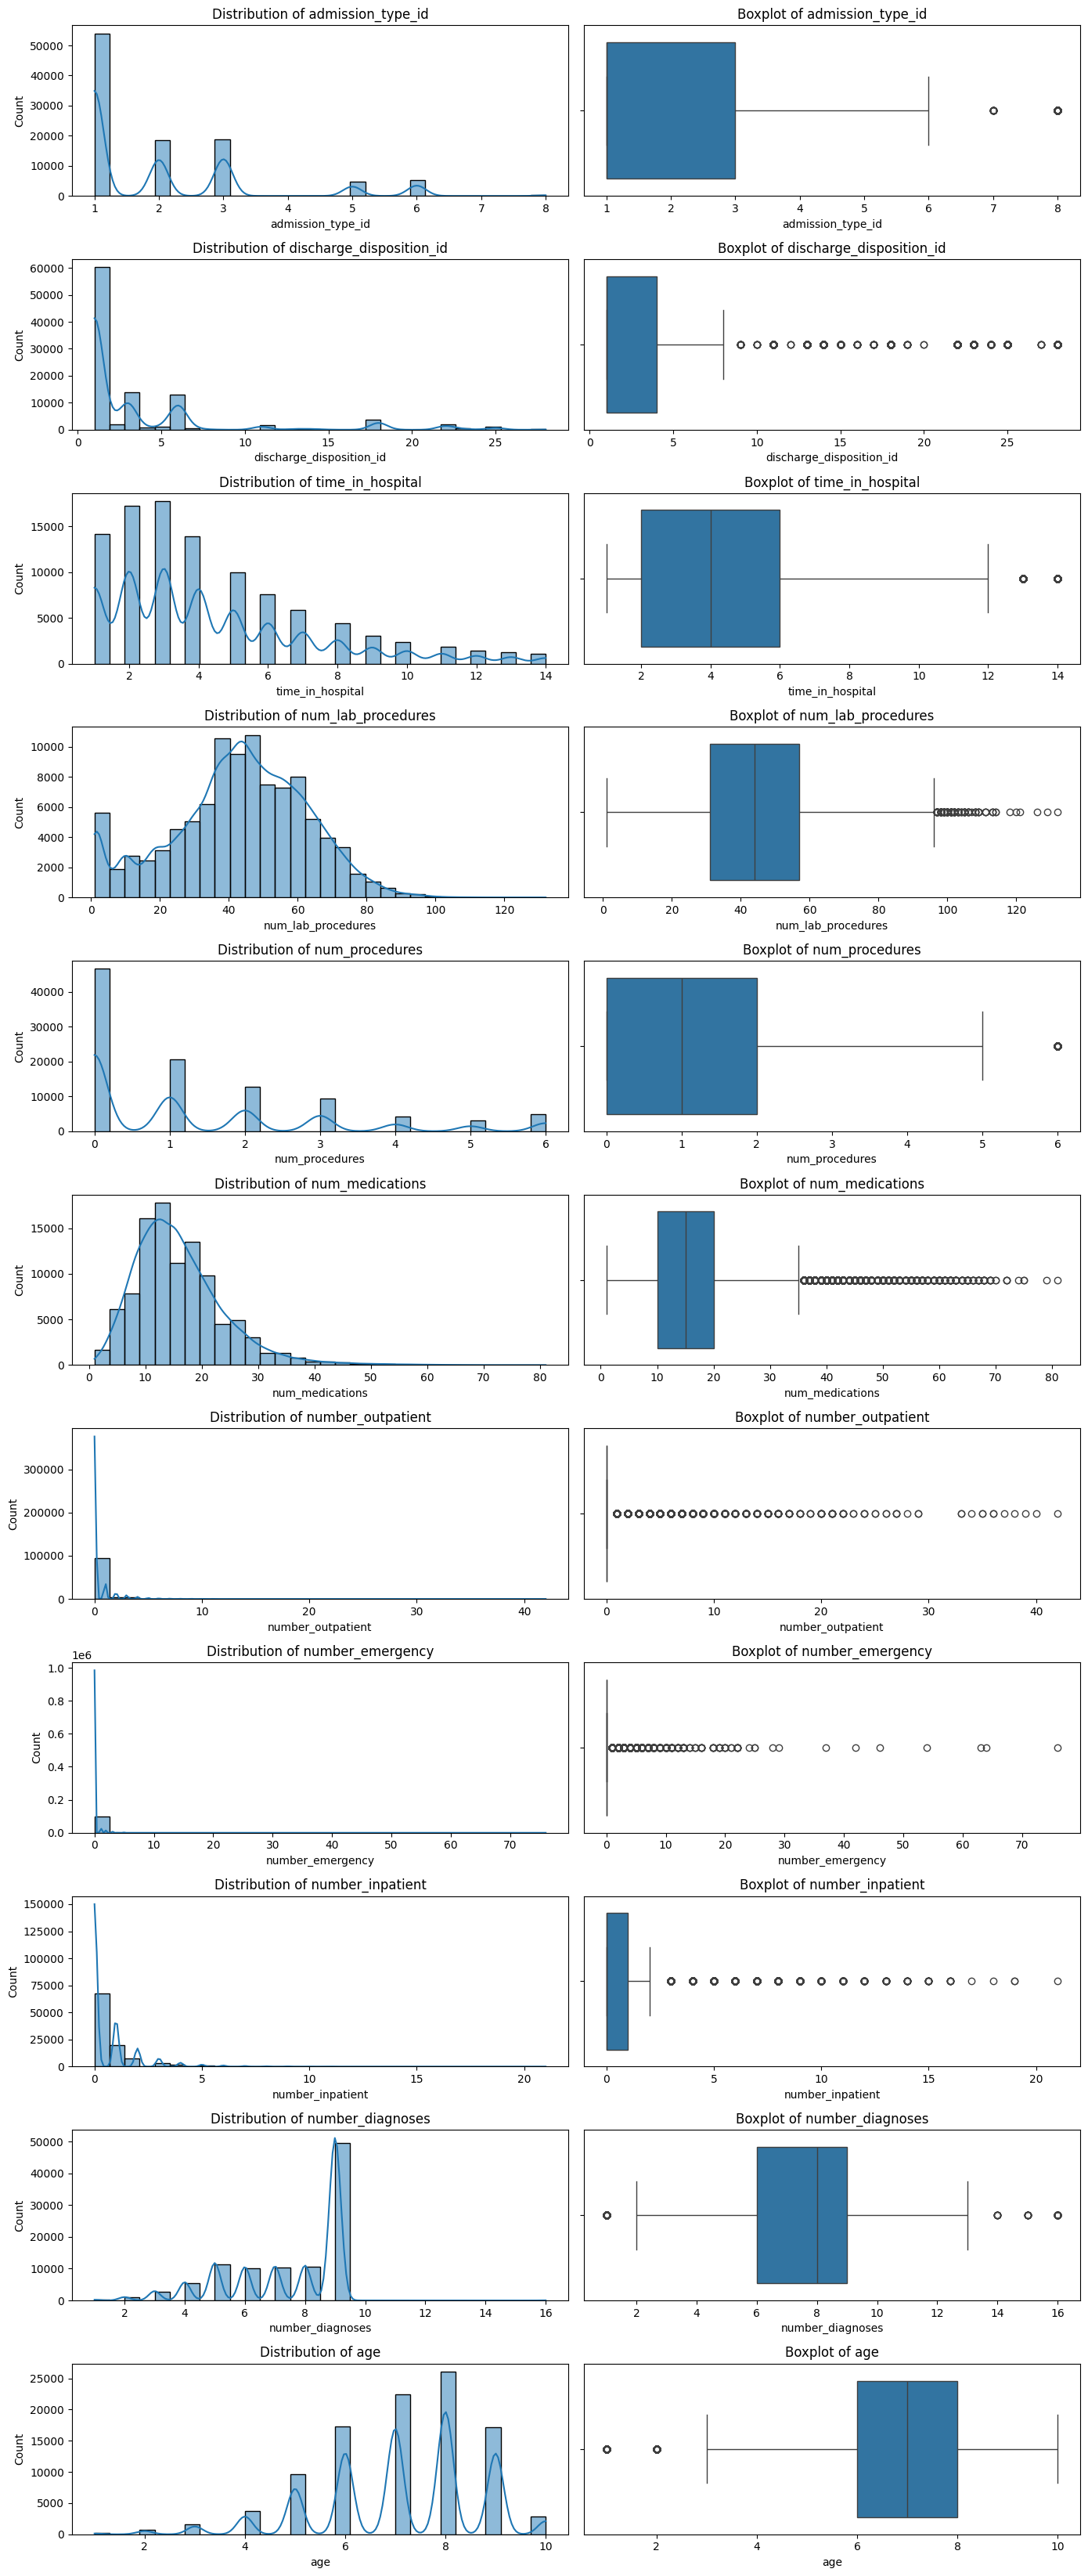

In [176]:
# Cell 4: histograms and boxplots for numerical features

# Get list of numeric columns
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualize each with histogram and boxplot
plt.figure(figsize=(14, len(num_cols)*3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2*i-1)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(len(num_cols), 2, 2*i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



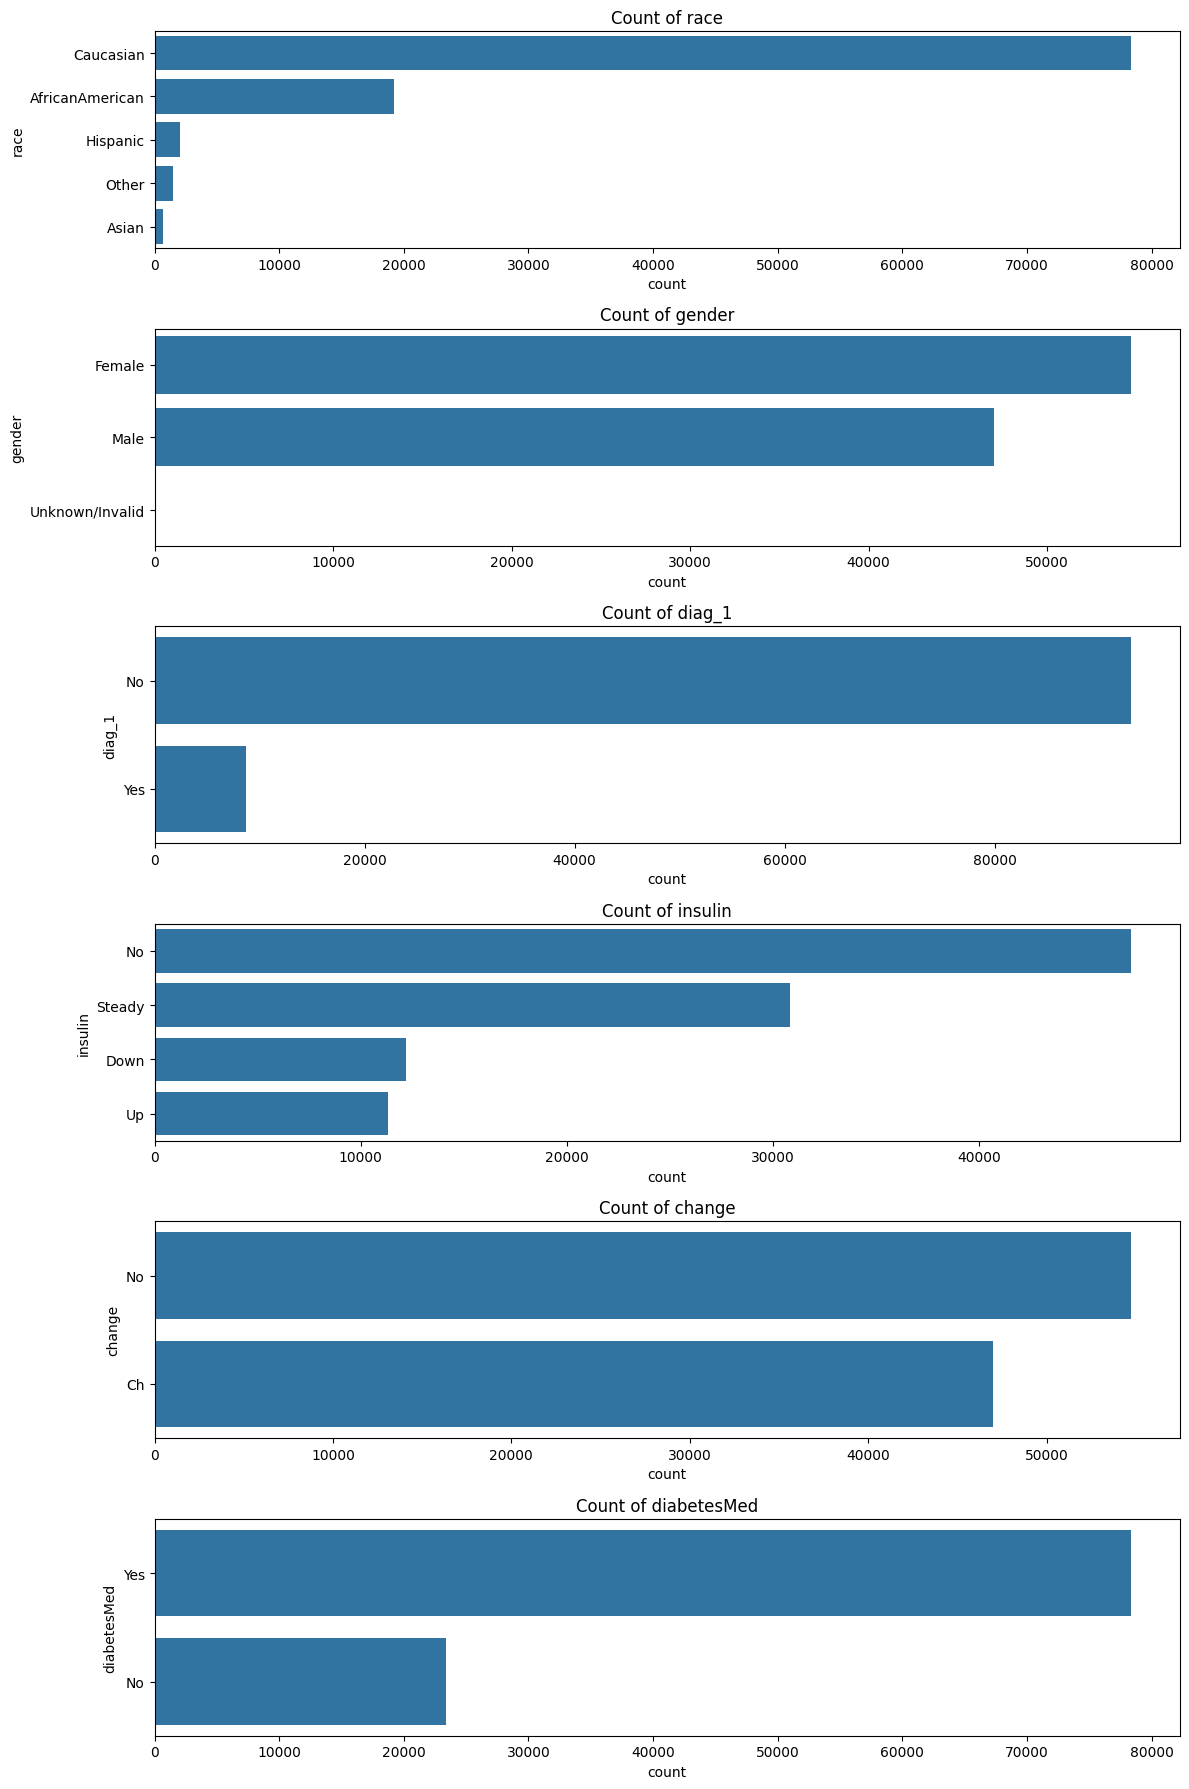

In [128]:
# Cell 5: bar plots for key categoricals
cat_cols = df_clean.select_dtypes('object').columns.tolist()
cat_cols = [c for c in cat_cols if c not in ['readmitted','age']]  # we already handled age

plt.figure(figsize=(12, len(cat_cols)*3))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(y=df_clean[col], order=df_clean[col].value_counts().index)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()


Let's create the model

In [177]:
df_clean.head()

,race,gender,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,insulin,change,diabetesMed,readmitted,age
0,Caucasian,Female,6,25,1,41,0,1,0,0,0,Yes,1,No,No,No,NO,1
1,Caucasian,Female,1,1,3,59,0,18,0,0,0,No,9,Up,Ch,Yes,>30,2
2,AfricanAmerican,Female,1,1,2,11,5,13,2,0,1,No,6,No,No,Yes,NO,3
3,Caucasian,Male,1,1,2,44,1,16,0,0,0,No,7,Up,Ch,Yes,NO,4
4,Caucasian,Male,1,1,1,51,0,8,0,0,0,No,5,Steady,Ch,Yes,NO,5


In [178]:
df_clean.to_csv("C:/Users/gihoz/OneDrive/Desktop/ReAdmitAi/Model_diabetes_data.csv", index=False)

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  # placeholder

# 1) Create binary target
#    <30 → 1, otherwise → 0
y = (df_clean['readmitted'] == '<30').astype(int)

# 2) Drop unwanted columns
X = df_clean.drop(columns=[
    'readmitted',           # target
    'diag_1',               # low variance
    'discharge_disposition_id'  # too many categories for manual input
])

# 3) Feature lists
numeric_cols = [
    'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

categorical_cols = [
    'race', 'gender', 'admission_type_id',
    'insulin', 'change', 'diabetesMed'
]

# 4) Build transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 5) Full pipeline (swap in any classifier later)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# 6) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 7) Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# --- Optional: Inspect transformed feature names ---
feature_names = (
    numeric_cols +
    list(pipeline.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_cols))
)
print("Transformed feature count:", len(feature_names))
print(feature_names[:20], '…')


Transformed feature count: 33
['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male', 'gender_Unknown/Invalid', 'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3'] …


📊 Model Evaluation on Test Set
Accuracy : 0.6793277971598447
Precision: 0.17444529456771232
Recall   : 0.5019815059445178
F1 Score : 0.2589143765614354


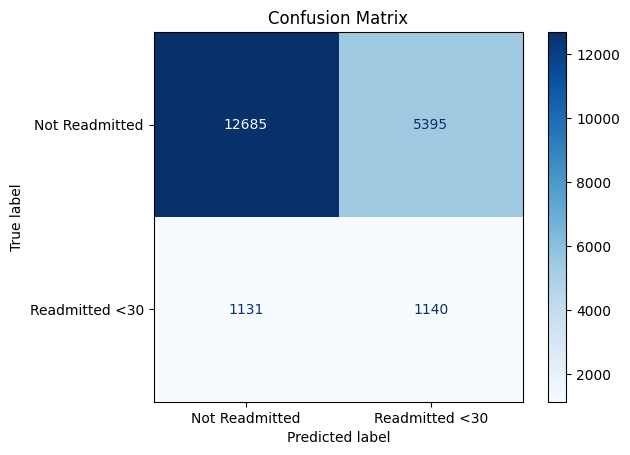

In [181]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Make predictions
y_pred = pipeline.predict(X_test)

# 2. Evaluate
print("📊 Model Evaluation on Test Set")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# 3. Show Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Readmitted", "Readmitted <30"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [182]:
import joblib

# Save the full pipeline with preprocessor and classifier
joblib.dump(pipeline, 'readmission_model.pkl')


['readmission_model.pkl']